In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from skimage.io import imread

<IPython.core.display.Javascript object>


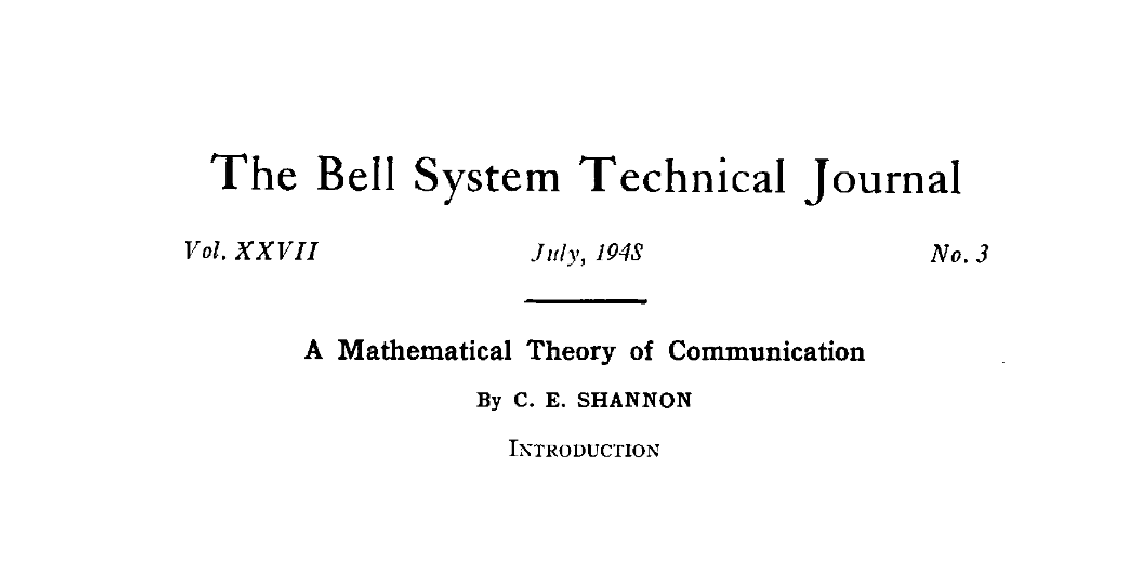

In [3]:
im = imread('shannon.png')

plt.figure()
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


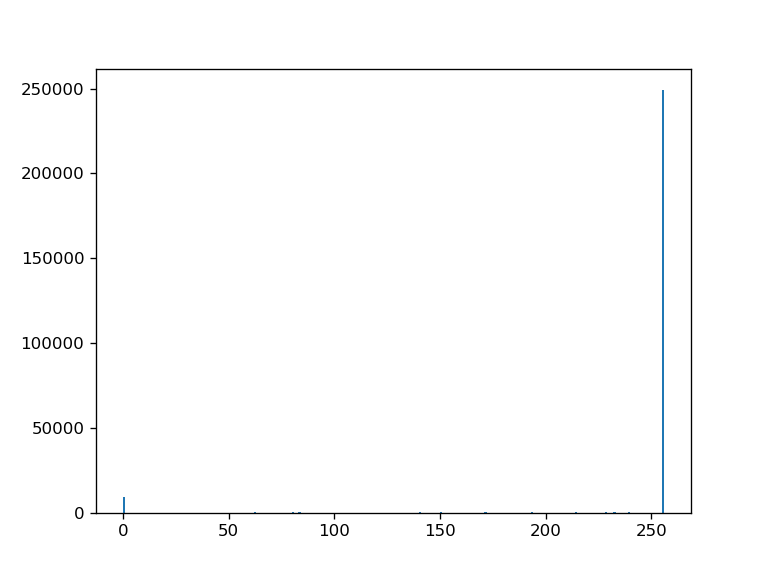

In [6]:
plt.figure()
plt.hist(im.flatten(), bins=np.arange(257))
plt.show()

<IPython.core.display.Javascript object>


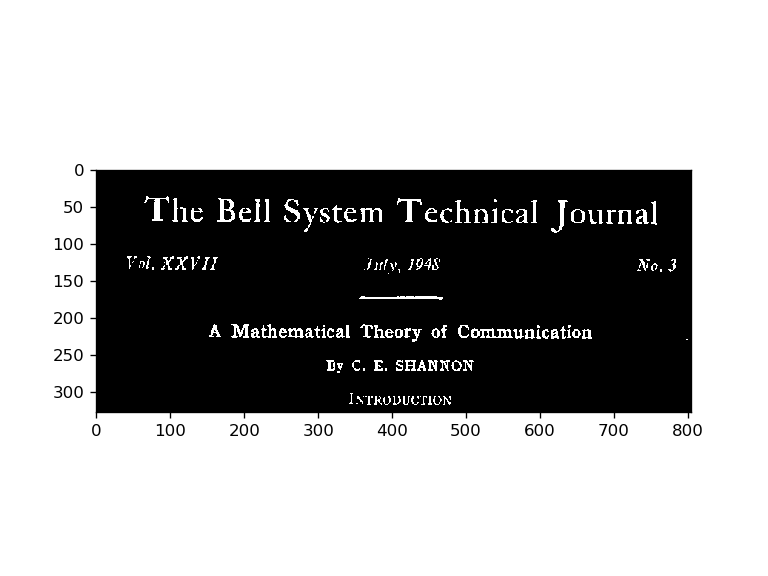

In [11]:
# Manual threshold
im_binary = im<127

plt.figure()
plt.imshow(im_binary, cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


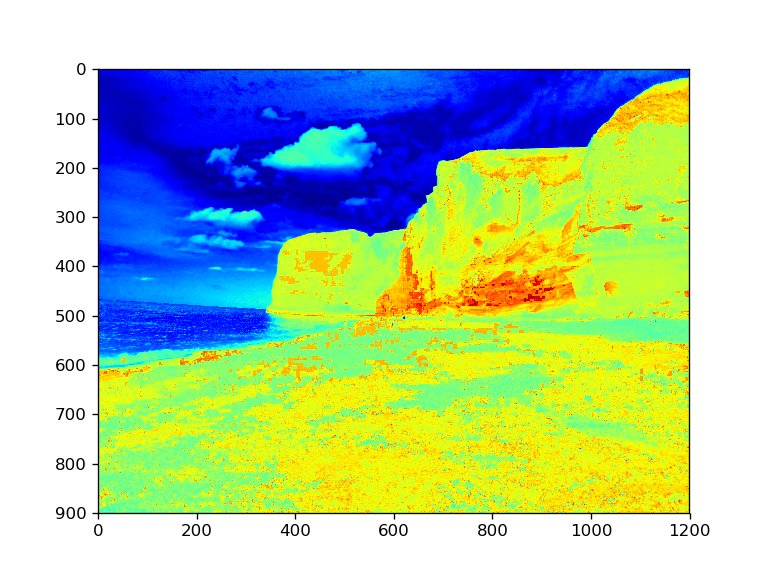

<IPython.core.display.Javascript object>


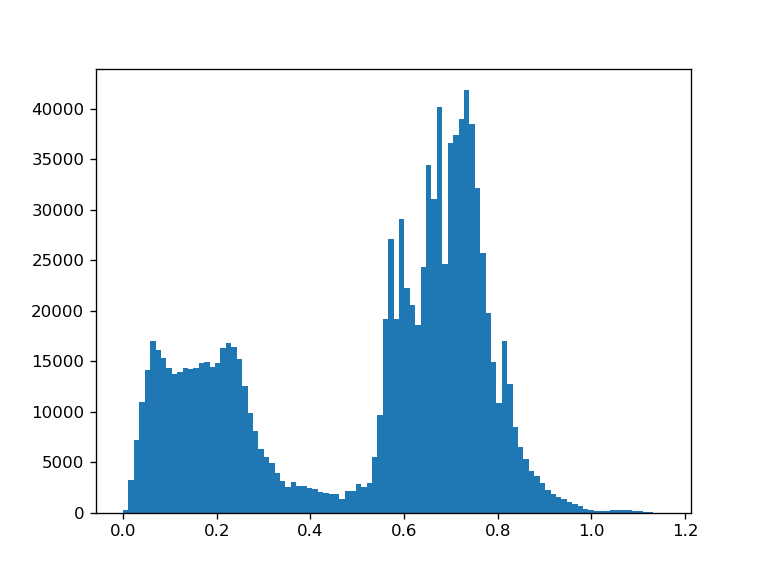

In [12]:
from skimage.color import rgb2hsv

def distance_image_space(im, coords):
    dmap = np.zeros((im.shape[0], im.shape[1]))
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            dmap[i,j] = np.sqrt((i-coords[0])**2 + (j-coords[1])**2)
    
    return dmap

def distance_color_space(im, coords):
    refcolor = im[coords[0],coords[1]]
    dmap = np.sqrt(((im-refcolor)**2).sum(axis=2))
    #np.zeros((im.shape[0], im.shape[1]))
    #for i in range(im.shape[0]):
    #    for j in range(im.shape[1]):
    #        dmap[i,j] = np.sqrt(((im[i,j]-refcolor)**2).sum())
    
    return dmap

im = imread('etretat.jpg')
hsv = rgb2hsv(im)

coords = (200,600)

dmap = distance_color_space(hsv.astype('float'), coords)

plt.figure()
plt.imshow(dmap, cmap=plt.cm.jet)
plt.show()

plt.figure()
plt.hist(dmap.flatten(), bins=100)
plt.show()

<IPython.core.display.Javascript object>


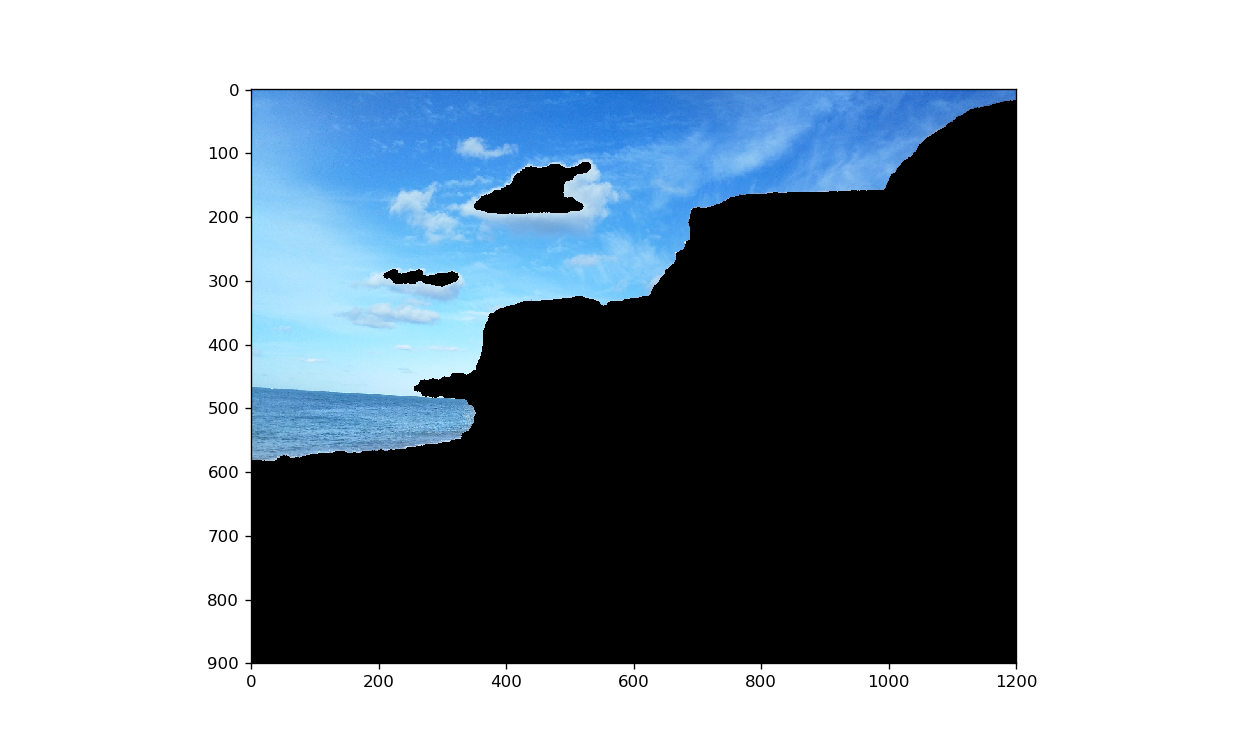

In [14]:
from skimage.morphology import opening,closing,disk

mask = (dmap<0.4)
mask = closing(opening(mask, disk(5)),disk(5))

im_m = im.copy()
im_m[mask==False] = 0

plt.figure()
plt.imshow(im_m)
plt.show()